**Exploratory Data Analysis**:

In [ ]:
# import the flightdata.csv from google drive

from google.colab import drive
drive.mount('/content/drive')

In [ ]:

import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import sklearn
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score



In [ ]:
dataset= pd.read_csv("/content/flightdata.csv")
dataset.head()


,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


**Activity 1: Descriptive statistical**:

* this
describe function we can understand the unique, top and frequent values of
categorical features
*  . And we can find mean, std, min, max and percentile
values of continuous features.




In [ ]:
dataset.describe()


,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_TIME,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
count,11231.0,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11124.000000,...,11231.000000,11116.000000,11043.000000,11043.000000,11231.000000,11231.000000,11231.000000,11043.000000,11231.000000,0.0
mean,2016.0,2.544475,6.628973,15.790758,3.960199,1334.325617,12334.516695,12302.274508,1320.798326,1327.189410,...,1537.312795,1523.978499,-2.573123,0.124513,0.010150,0.006589,190.652124,179.661233,1161.031965,NaN
std,0.0,1.090701,3.354678,8.782056,1.995257,811.875227,1595.026510,1601.988550,490.737845,500.306462,...,502.512494,512.536041,39.232521,0.330181,0.100241,0.080908,78.386317,77.940399,643.683379,NaN
min,2016.0,1.000000,1.000000,1.000000,1.000000,7.000000,10397.000000,10397.000000,10.000000,1.000000,...,2.000000,1.000000,-67.000000,0.000000,0.000000,0.000000,93.000000,75.000000,509.000000,NaN
25%,2016.0,2.000000,4.000000,8.000000,2.000000,624.000000,10397.000000,10397.000000,905.000000,905.000000,...,1130.000000,1135.000000,-19.000000,0.000000,0.000000,0.000000,127.000000,117.000000,594.000000,NaN
50%,2016.0,3.000000,7.000000,16.000000,4.000000,1267.000000,12478.000000,12478.000000,1320.000000,1324.000000,...,1559.000000,1547.000000,-10.000000,0.000000,0.000000,0.000000,159.000000,149.000000,907.000000,NaN
75%,2016.0,3.000000,9.000000,23.000000,6.000000,2032.000000,13487.000000,13487.000000,1735.000000,1739.000000,...,1952.000000,1945.000000,1.000000,0.000000,0.000000,0.000000,255.000000,236.000000,1927.000000,NaN
max,2016.0,4.000000,12.000000,31.000000,7.000000,2853.000000,14747.000000,14747.000000,2359.000000,2400.000000,...,2359.000000,2400.000000,615.000000,1.000000,1.000000,1.000000,397.000000,428.000000,2422.000000,NaN


**Activity 2: Visual analysis** :


*  the process of using visual representations, such as charts,
plots, and graphs, to explore and understand data

*   It is a way to quickly
identify patterns, trends, and outliers in the data, which can help to gain
insights and make informed decisions

**Activity 2.1: Univariate analysis** :


1.  Here we have displayed two different graphs such as displot and
regplot.






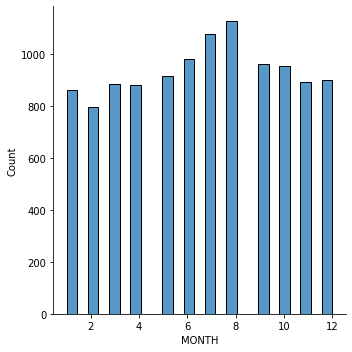

In [ ]:
sns.displot(dataset.MONTH)

**regplot** :


* This method is used to plot data and a linear regression model fit. There are a number of mutually exclusive options for estimating the regression model

* x, y: These are Input variables. If strings, these should correspond with column names in “data”. When pandas objects are used, axes will be labeled with the series name.



**Activity 2.2: Bivariate analysis** :

<Axes: xlabel='ARR_DELAY', ylabel='ARR_DEL15'>

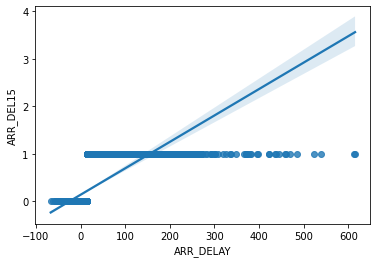

In [ ]:
sns.regplot(x='ARR_DELAY',y='ARR_DEL15',data=dataset)

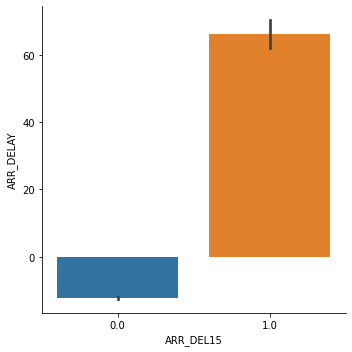

In [ ]:
sns.catplot(x='ARR_DEL15',y='ARR_DELAY',kind='bar',data=dataset)

***Activity 2.3: Multivariate analysis*** :

*  multivariate analysis is to find the relation between
multiple features

*   Here we have used a swarm plot from the seaborn
package.




<Axes: >

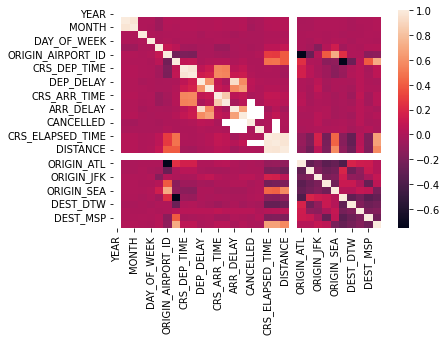

In [ ]:
sns.heatmap(dataset.corr())

**Splitting data into dependent and independent variables**

In [ ]:
dataset = pd.get_dummies(dataset, columns=['ORIGIN','DEST'])

In [ ]:
X = dataset.iloc[:, 0:8].values
y = dataset.iloc[:, 8:9].values

**Splitting data into train and test** :


1.  first split the dataset into x and y and then split the data set

2.  On x variable, dataset is passed with dropping
the target variable. 

3.   And on y target variable is passed

4.   For splitting training
and testing data we are using the train_test_split() function from sklearn

5.  As
parameters, we are passing x, y, test_size, random_state.











In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
                                                 

In [ ]:
train_x,test_x,train_y,test_y = train_test_split(dataset.drop('ARR_DEL15', axis=1), dataset['ARR_DEL15'], test_size=0.2, random_state=0)

In [ ]:
x_test.shape

(2247, 8)

In [ ]:
x_train.shape

(8984, 8)

In [ ]:
y_test.shape

(2247, 1)

In [ ]:
y_train.shape

(8984, 1)